The stock market data was statistically and visually explored and subsequently cleaned.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import datetime

Data was imported and summary statisics and exploratory analysis were provided.

In [2]:
# Importing Data
filepath = "C:/Users/Anthony Girard/CSE391_stuff/Project_Data.csv"
data = pd.read_csv(filepath)
print("Data Shape: ", data.shape, "\n")
print(data.info())
display(data.describe())
display(data.head())

Data Shape:  (667, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 3 columns):
date               667 non-null int64
signal             667 non-null float64
spy_close_price    667 non-null float64
dtypes: float64(2), int64(1)
memory usage: 15.7 KB
None


,date,signal,spy_close_price
count,6.670000e+02,667.000000,667.000000
mean,2.012939e+07,5.166603,163.169369
std,7.762422e+03,23.392818,39.210384
min,2.012010e+07,-3.802670,127.495000
25%,2.012083e+07,3.418083,140.880000
50%,2.013051e+07,3.893689,159.750000
75%,2.014010e+07,4.408313,181.500000
max,2.014083e+07,432.961165,710.310000


,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


We can conclude there was no missing data: 667 total entries, as well as 667 non-null values for all three columns
There is at least one statistical outlier for signal and spy_close_price, as they both have a max value significantly larger than what is expected to be inside their respective Interqartile ranges given the mean, std, and quartile values described.

Visualization of the raw data is provided below.

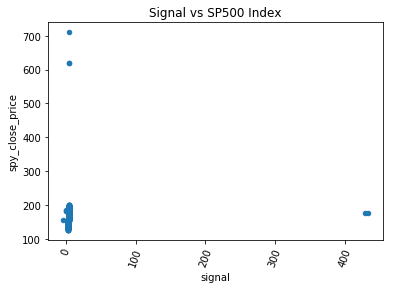

In [3]:
#Graph 1.1: signal vs spy_close_price
data.plot(kind = 'scatter', x = 'signal', y = 'spy_close_price', rot = 70)
plt.xlabel("signal")
plt.ylabel("spy_close_price")
plt.title("Signal vs SP500 Index")
plt.show()

It is obvious from this graph that there exist outliers for both signal and spy_close_price.

Now the outliers will be dropped. We defined an outlier as being any point of data that lies over (1.5 * IQR) below the first quartile (Q1) or above the third quartile (Q3)in a data set.

In [4]:
# Eliminating Outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

df_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

display(df_outliers)
display(df.describe())

,date,signal,spy_close_price
303,20130326,-3.802670,156.1900
421,20130912,4.193204,618.9500
422,20130913,4.143689,619.3300
423,20130916,4.124515,710.3100
459,20131105,429.514563,176.2700
460,20131106,432.961165,177.1700
570,20140414,0.004560,182.9401
571,20140415,0.454976,184.2000
572,20140416,0.455898,186.1250


,date,signal,spy_close_price
count,6.580000e+02,658.000000,658.000000
mean,2.012933e+07,3.911967,160.824444
std,7.778235e+03,0.525500,21.488326
min,2.012010e+07,3.099757,127.495000
25%,2.012083e+07,3.419053,140.817500
50%,2.013050e+07,3.890291,159.245000
75%,2.013788e+07,4.409072,180.985000
max,2.014083e+07,4.881311,200.710000


Doing this caused the numbers of entries to decrease by 9 (size of df_outliers), meaning 9 entries were found to have outlier data. We chose to drop outliers from the data set rather than replace them because 9 outliers is a relatively very small fraction of the raw data. Additionally, the outliers found were not particularly close to their respective IQRs, so it seems as though they were complete errors.

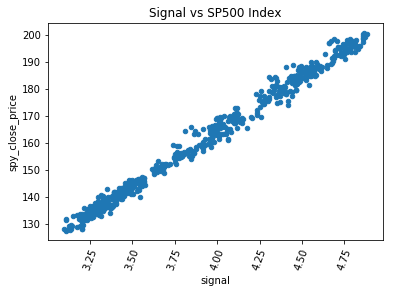

In [5]:
#Graph 1.2: signal vs spy_close_price
df.plot(kind = 'scatter', x = 'signal', y = 'spy_close_price', rot = 70)
plt.xlabel("signal")
plt.ylabel("spy_close_price")
plt.title("Signal vs SP500 Index")
plt.show()

Now, the graph of signal vs spy_close_price shows that outleirs have been removed. Also, it appears that there is a correlation between spy_close_price and signal.

The format for date is given in an integer form, however, it is attempting to describe a date (e.g. 20120103 is the date Oct 3rd, 2012). We will convert these values into Python datetimes, so that they may be graphed (3 years of data is provided, so going from one year to the next provides a huge jump in the integer data, which is not accurate). 

In [6]:
# Converting 'date' Data to Datetimes
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

C:\Users\Anthony Girard\Anaconda3\envs\TensorFlowEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


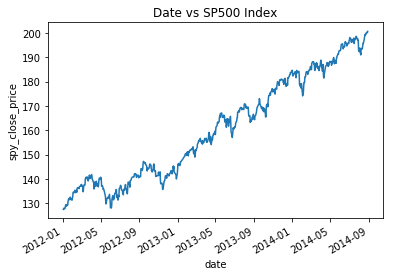

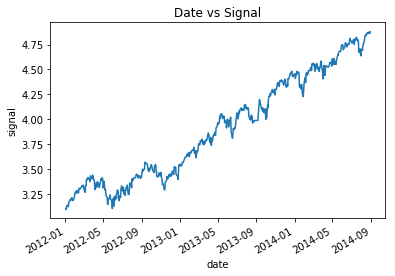

In [7]:
#Graph 2: date vs spy_close_price
plt.plot(df['date'].values, df['spy_close_price'])
plt.gcf().autofmt_xdate()
plt.xlabel("date")
plt.ylabel("spy_close_price")
plt.title("Date vs SP500 Index")
plt.show()

#Graph 3: date vs signal
plt.plot(df['date'].values, df['signal'])
plt.gcf().autofmt_xdate()
plt.xlabel("date")
plt.ylabel("signal")
plt.title("Date vs Signal")
plt.show()

The graphs above show that both signal and spy_close_price are increasing over time.